In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
import json
import pandas as pd
from common.db import create_engine_for_db
engine = create_engine_for_db()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [7]:
#dm_raw = pd.read_csv('crypto-markets.csv')  
#dm_raw['date'] = pd.to_datetime(dm_raw['date'])
sql = '''
    select *
    from market_data.daily_tbl
'''
dm_raw = pd.read_sql(sql,  con=engine)



In [9]:
dm_raw[dm_raw['date'] == '2015-11-12'].head(10)

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio
1738,bitcoin,2015-11-12,BTC,Bitcoin,1,314.079987,345.079987,313.359985,338.149994,78477800,5015563264,31.719999,0.7815
6450,dash,2015-11-12,DASH,Dash,14,2.280000,2.580000,2.280000,2.540000,86587,15223157,0.300000,0.8667
8812,ethereum,2015-11-12,ETH,Ethereum,3,0.796455,0.913919,0.763510,0.895711,806156,66880152,0.150000,0.8789
13816,litecoin,2015-11-12,LTC,Litecoin,7,2.970000,3.290000,2.970000,3.280000,4133180,141446848,0.320000,0.9687
15786,monero,2015-11-12,XMR,Monero,11,0.450587,0.464221,0.412313,0.443275,46397,4438853,0.050000,0.5965
18810,stellar,2015-11-12,XLM,Stellar,4,0.001963,0.002124,0.001924,0.002124,3518,10274691,0.000000,1.0000
20496,tether,2015-11-12,USDT,Tether,8,1.000000,1.000000,1.000000,1.000000,34994,451600,0.000000,0.0000


In [10]:
dm_raw.tail(10)

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio
23788,usd-coin,2019-10-03,USDC,USD Coin,20,1.000000,1.01,0.997937,1.000000,217085171,474684574,0.012063,0.171019
23789,usd-coin,2019-10-04,USDC,USD Coin,20,1.000000,1.01,1.000000,1.010000,154530799,476792469,0.010000,1.000000
23790,usd-coin,2019-10-05,USDC,USD Coin,20,1.010000,1.01,0.996109,0.998863,131141182,473493991,0.013891,0.198258
23791,usd-coin,2019-10-06,USDC,USD Coin,20,0.998916,1.02,0.996903,1.010000,154064852,480030266,0.023097,0.567043
23792,usd-coin,2019-10-07,USDC,USD Coin,20,1.010000,1.02,0.996638,1.010000,183256904,471937627,0.023362,0.571954
23793,usd-coin,2019-10-08,USDC,USD Coin,20,1.000000,1.01,0.998372,1.010000,182457962,468318970,0.011628,1.000000
23794,usd-coin,2019-10-09,USDC,USD Coin,20,1.010000,1.01,0.991701,1.000000,213518684,461621063,0.018299,0.453522
23795,usd-coin,2019-10-10,USDC,USD Coin,20,1.000000,1.00,0.995636,1.000000,219588027,452018483,0.004364,1.000000
23796,usd-coin,2019-10-11,USDC,USD Coin,20,1.000000,1.01,0.990913,1.010000,212197499,470359604,0.019087,1.000000
23797,usd-coin,2019-10-12,USDC,USD Coin,20,1.010000,1.01,0.999284,1.000000,155919006,468394318,0.010716,0.066816


In [ ]:
From kaggle, the descriptions are:
Volume - Transactions volume
market - Market Cap
ranknow - Currency rank
spread - Spread between high and low
    

In [11]:
dm_raw.describe()

,ranknow,open,high,low,close,volume,market,spread,close_ratio
count,23798.000000,23798.000000,23798.000000,23798.000000,23798.000000,2.379800e+04,2.379800e+04,23798.000000,23798.000000
mean,10.828389,346.220873,357.159270,334.374554,346.540106,8.498894e+08,7.769916e+09,22.784667,0.487279
std,10.111076,1458.785046,1505.380466,1405.219557,1459.662525,2.916012e+09,2.592639e+10,127.362338,0.307227
min,1.000000,0.001352,0.001509,0.001091,0.001357,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.000000,0.980514,0.999998,0.937739,0.982201,2.419852e+06,1.238326e+08,0.030000,0.222200
50%,9.000000,4.060000,4.200000,3.920000,4.060000,4.870415e+07,1.058170e+09,0.280000,0.482450
75%,14.000000,84.485000,88.007497,81.555000,84.592499,2.793097e+08,3.643020e+09,4.450000,0.754900
max,72.000000,19475.800781,20089.000000,18974.099609,19497.400391,4.510573e+10,3.265020e+11,4110.399902,1.000000


In [12]:
#dm_raw.groupby(list('slug'))
dm_raw.groupby('id').describe().unstack().count()

1440

In [13]:
dm_raw[np.isnan(dm_raw.close)==True]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [14]:
dm_raw[np.isnan(dm_raw.open)==True]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [15]:
dm_raw[np.isnan(dm_raw.high)==True]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [76]:
dm_raw[np.isnan(dm_raw.close)==True]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [17]:
dm_raw[np.isnan(dm_raw.volume)==True]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [18]:
dm_raw[np.isnan(dm_raw.market)==True]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [19]:
dm_raw[dm_raw.high<dm_raw.open]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [20]:
dm_raw[dm_raw.high<dm_raw.close]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [21]:
dm_raw[dm_raw.low>dm_raw.close]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [22]:
dm_raw[dm_raw.low>dm_raw.open]

,id,date,symbol,name,ranknow,open,high,low,close,volume,market,spread,close_ratio


In [136]:
#We already pulled the top ten when we loaded teh daily.
#Lets look at the top 20 based on market cap on 11/1
#top20 = dm_raw[dm_raw.date =='20181101'].sort_values(by=['market'],ascending=[False]).head(20)
#top20 = top20.drop(['date','ranknow', 'open', 'high', 'close', 'low', 'volume', 'market', 'close_ratio', 'spread', 'symbol', 'name'], axis=1)

In [23]:
dm_raw.groupby('id')['date'].describe().unstack()

        id              
count   binance-coin                        810
        bitcoin                            2359
        bitcoin-cash                        812
        bitcoin-cash-sv                     338
        cardano                             742
        chainlink                           753
        dash                               2067
        eos                                 834
        ethereum                           1528
        ethereum-classic                   1176
        huobi-token                         617
        iota                                852
        litecoin                           2359
        monero                             1970
        neo                                1129
        stellar                            1895
        tether                             1686
        tezos                               741
        tron                                760
        usd-coin                            370
unique  binance

Ben asked if the market moves together...

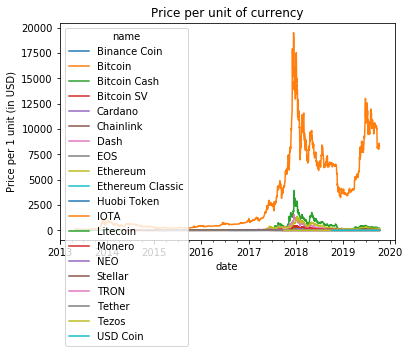

In [24]:
ax = dm_raw.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

It looks like it does, but with bitcoin in there, the rest of the currencies are packed in tightly.  Lets try removing bitcoin for effect.

In [25]:
almosttop = dm_raw[dm_raw.symbol !='BTC']

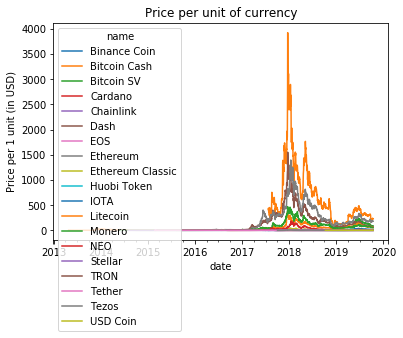

In [26]:
ax = almosttop.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

Symbol is not unique.  From what I have read, a new exchange can use whatever symbol it wants.  The "Slug" value is coordinated across exchanges and is unique.  This is important to note when joining to other data sources.

In [129]:
#dm_raw.groupby['slug','symbol'].nunique()
x = dm_raw.groupby(['slug','symbol']).size()

In [151]:
#Slugs only have 1 unique symbol
ss = dm_raw.groupby(['slug','symbol']).size().reset_index().rename(columns={0:'count'})
ss2 = ss.groupby(['slug']).size().reset_index().rename(columns={0:'cnt'})
ss2[ss2.cnt>1]

,slug,cnt


In [150]:
#Symbols sometimes have more than 1 unique slug
ss = dm_raw.groupby(['symbol','slug']).size().reset_index().rename(columns={0:'count'})
ss2 = ss.groupby(['symbol']).size().reset_index().rename(columns={0:'cnt'})
ss2[ss2.cnt>1]

,symbol,cnt
27,ACC,3
68,ALT,2
93,ARB,2
111,AT,2
150,BBK,2
185,BET,2
199,BIT,3
208,BITS,3
226,BLZ,2
247,BOX,2


In [155]:
#Example: XRA links to xriba and to ratecoin
dm_raw[dm_raw.symbol=='XRA'].head(1)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
287191,xriba,XRA,Xriba,2018-08-30,589,0.109548,0.109621,0.010814,0.014206,504.0,0.0,0.0343,0.1


In [156]:
dm_raw[dm_raw.symbol=='XRA'].tail(1)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
690985,ratecoin,XRA,Ratecoin,2018-11-29,1461,0.00065,0.000733,0.00062,0.000696,207.0,85282.0,0.6726,0.0


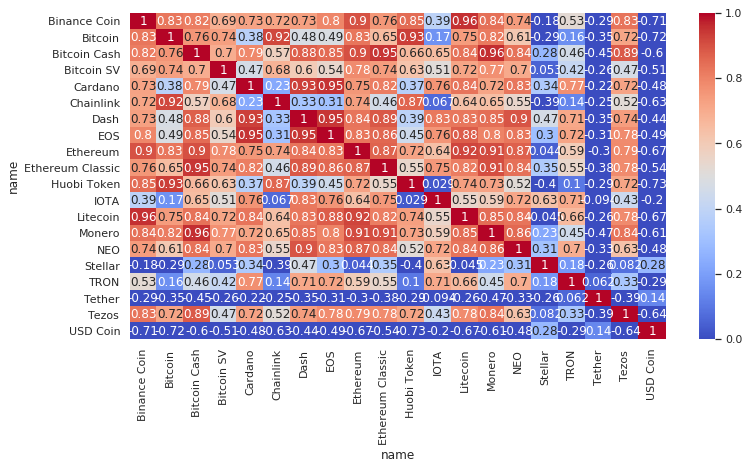

In [89]:
#top10Currencies = dm_raw.groupby('name')['market'].last().sort_values(ascending=False).head(20)
closing_prices_top10 = dm_raw_recent.groupby(['date', 'name'])['close'].mean().unstack()
closing_prices_top10.corr()

plt.figure(figsize=(12,6))
sns.heatmap(closing_prices_top10.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
#plt.title('Correlation Heatmap between Bitcoin and other top 5 Crypto')

In [ ]:
Lets check fields and if they make sense

In [88]:
#Close Ratio looks good besides rounding differences
check_close = (dm_raw.close - dm_raw.low)/(dm_raw.high-dm_raw.low) - dm_raw.close_ratio
check_close[check_close>.1]

Series([], dtype: float64)

In [159]:
#Spread looks good besides rounding differences
check_spread = dm_raw.high - dm_raw.low - dm.spread
check_spread[check_spread>.1]    

Series([], dtype: float64)

Cryptocurrency markets are supposedly always open.  However, the following records represent skipped days.

In [90]:
import datetime 
last_symbol ='AAA'
last_date = datetime.date(2013,4,28)

for index, row in dm_raw.iterrows():
    if last_symbol == row["symbol"]:            
        if (row["date"] - last_date).days >1:
            print (row["symbol"], last_date, row["date"])
    else:
        last_symbol = row["symbol"]
    last_date = row["date"]
            
        
        

XMR 2014-06-04 00:00:00 2014-06-06 00:00:00
USDT 2015-02-26 00:00:00 2015-03-02 00:00:00
USDT 2015-03-03 00:00:00 2015-03-06 00:00:00


This was a lot worse across the whole dataset.  The currencies we have are fairly clean.